In [1]:
# import libraries
import MDAnalysis as mda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis.analysis.dihedrals as dih
import seaborn as sns

In [2]:
# setup universe
## CAUTION: Only works for normal residue proteins! ncAA's need a special dihedral definition (defined in the wiki!)
u = mda.Universe("md_0_1_298.gro", "md_0_1_298.xtc")
print(u)
print(len(u.trajectory))
print("Number of residues: ", print(u.residues))
print("Number of atoms:", print(u.atoms))

<Universe with 6743 atoms>
5001
<ResidueGroup [<Residue DAL, 1>, <Residue MLE, 2>, <Residue MLE, 3>, ..., <Residue SOL, 2228>, <Residue SOL, 2229>, <Residue NA, 2230>]>
Number of residues:  None
<AtomGroup [<Atom 1: N of type N of resname DAL, resid 1 and segid SYSTEM>, <Atom 2: CA of type C of resname DAL, resid 1 and segid SYSTEM>, <Atom 3: CB of type C of resname DAL, resid 1 and segid SYSTEM>, ..., <Atom 6741: HW1 of type H of resname SOL, resid 2229 and segid SYSTEM>, <Atom 6742: HW2 of type H of resname SOL, resid 2229 and segid SYSTEM>, <Atom 6743: NA of type NA of resname NA, resid 2230 and segid SYSTEM>]>
Number of atoms: None


In [3]:
# select a few atomgroups for analysis
bb = u.select_atoms('protein and backbone')  # a selection (AtomGroup)
#sc = u.select_atoms('protein and sidechain')

In [4]:
# rmsd for whole trajectory
from MDAnalysis.analysis import rms, align

u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone', groupselections=['name CA'])
rmsd_analysis.run()

In [5]:
# plot of RMSF!

average = align.AverageStructure(u, u, select='protein and name CA', ref_frame=0).run()
ref = average.universe
aligner = align.AlignTraj(u, ref,
                          select='protein and name CA',
                          in_memory=True).run()
c_alphas = u.select_atoms('protein and name CA')
R = rms.RMSF(c_alphas).run()

import matplotlib.pyplot as plt

plt.plot(c_alphas.resids, R.rmsf)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
#plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
#plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend();

TypeError: unsupported operand type(s) for +=: 'float' and 'NoneType'

In [1]:
import MDAnalysis.analysis.dihedrals as dih

r = dih.Ramachandran(u.atoms, c_name='C', n_name='N', ca_name='CA', check_protein=False).run()
print(len(u.trajectory))

angle_table = r.angles
phis = angle_table[:,:,0]       # extract phi angles (?)
psis = angle_table[:,:,1]       # extract psi angles (?)

NameError: name 'u' is not defined

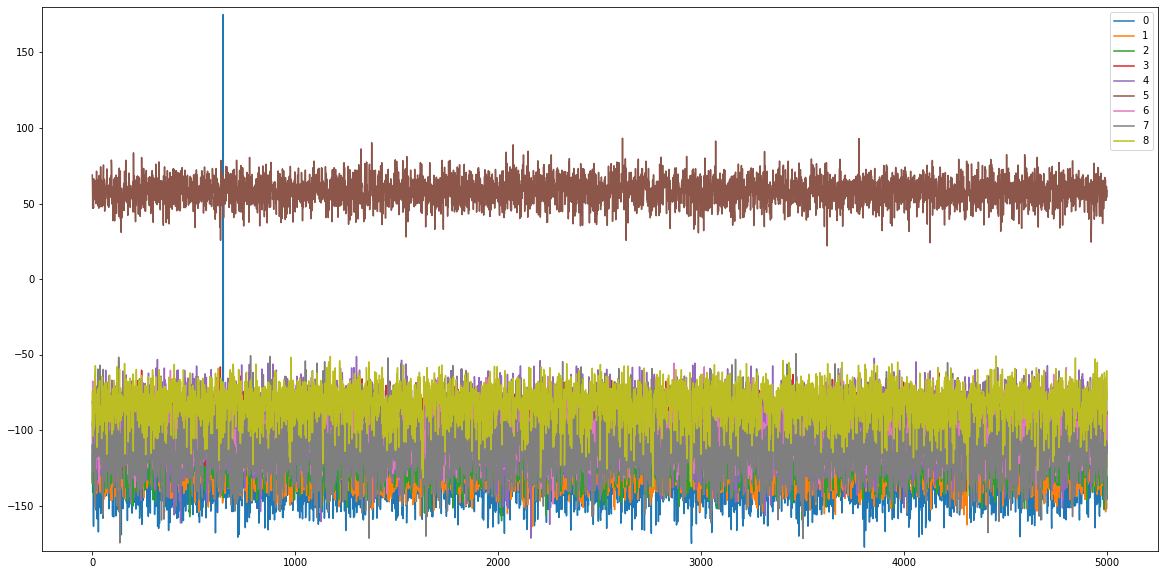

In [8]:
# plot phi angles 
#s = pd.DataFrame(phis[:,(7)])
s = pd.DataFrame(phis)


s.plot(figsize=(20,10), ylim=(-180,180))

In [9]:
#calculate mean and stddev?
phi_stdevs = np.std(phis, axis=0)
phi_means = np.mean(phis, axis=0)
psi_stdevs = np.std(psis, axis=0)
psi_means = np.mean(phis, axis=0)

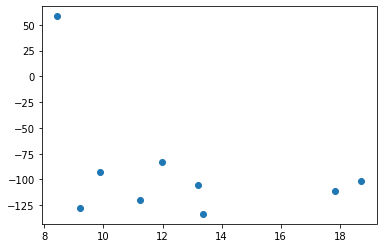

In [10]:
plt.scatter(phi_stdevs,phi_means)